# Grayscale tutorial

Analyze grayscale image data and extract pixel intensity information from an object of interest. 

In [ ]:
# Install PlantCV and required dependencies
%pip install "altair>=5" ipympl plantcv

# Give access and mount your Google Drive (need a Google Account)
# Change path to directory you wish output files to be saved to.
from google.colab import drive
drive.mount('/content/gdrive')

# Enable widget feature with matplotlib
from google.colab import output
output.enable_custom_widget_manager()

#View working directory, may need to change path
%pwd

# Section 1: Importing Image and Libraries

In [ ]:
# Set the notebook display method
# If widget is not working, then change to inline
%matplotlib widget

# Import libraries
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

# Print out the version of PlantCV being used by the Jupyter kernel
pcv.__version__

## Input/Output variables

The options class mimics the workflow command-line argument parser that is used for workflow parallelization. Using it while developing a workflow in Jupyter makes it easier to convert the workflow to a script later. Remember, always keep your raw images separate from your newly processed images!

In [ ]:
# Input/output options
args = WorkflowInputs(
    images=["https://raw.githubusercontent.com/danforthcenter/plantcv-tutorial-grayscale/main/img/gray.png"],    
    names="image1",
    result="gray_results.json",
    outdir=".",
    writeimg=True,
    debug="plot"
    )

In [ ]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 20
pcv.params.text_thickness = 20

## Read the input image

### Google Colaboratory Users:
If you are running this notebook using Google Colaboratory, you will need to use the cell below to complete the tutorial unless you cloned the repository from GitHub to your personal Google Drive account. Once you begin developing your workflow for your data, you can delete this text cell and the code cell below so you avoid any conflicts the next time you use this notebook.

In [ ]:
img = pcv.io.open_url(url=args.image1)

### Local system use:
If you have downloaded this notebook or the repository to your local device, then you will need to use the cell below to bring your image into the notebook. Do not run this line if you are navigating through the **tutorial** using Google Colaboratory.

NOTE: *If you are developing your own workflow using this notebook, make sure you remove the code cell above with the URL and uncomment (remove the hashtag [#] to make the code active. This will call the image you defined during the Inputs/Outputs step.*

### Reading images into your environment using *pcv.readimage()*
Inputs:
   * filename = Image file to be read in
   * mode     = How the image will be read into the notebook; either 'native' (default), 'rgb', 'gray', 'csv', or 'envi'

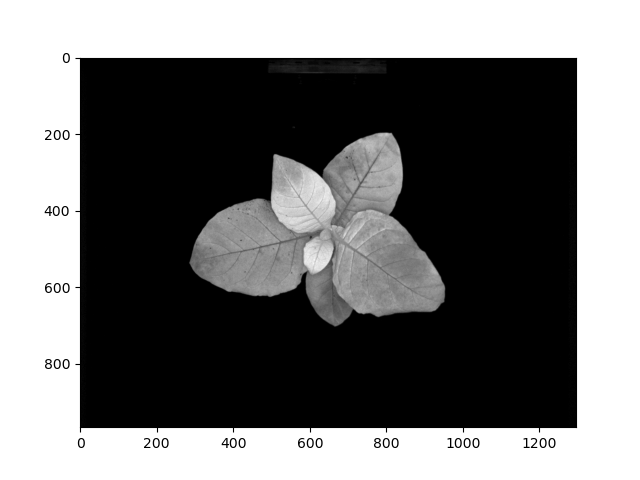

In [4]:
# Read in the garyscale data 
img, filename, path = pcv.readimage(filename=args.image1)

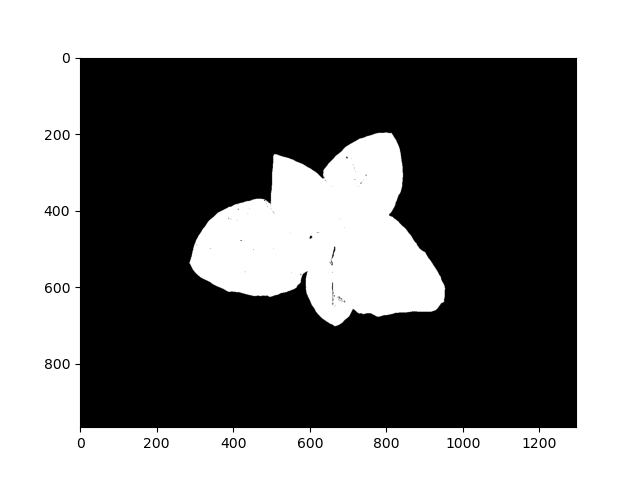

In [5]:
# Creates a binary image from a gray image

bin_img = pcv.threshold.otsu(gray_img=img, object_type="light")

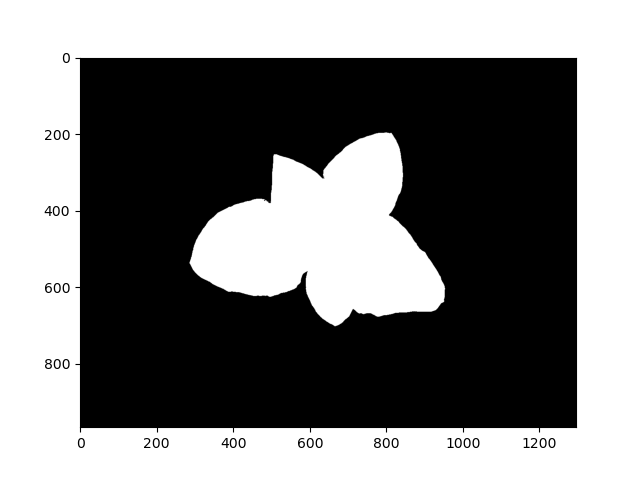

In [6]:
# Complete a flood fill to include false negative signal

mask = pcv.fill_holes(bin_img=bin_img)


In [7]:
# Analyze grayscale intensity values of the plant 

analysis_image  = pcv.analyze.grayscale(gray_img=img, labeled_mask=mask,
                                        n_labels=1, bins=100, 
                                        label="default")


alt.FacetChart(...)

In [8]:
# Save stored data out to a file 

pcv.outputs.save_results(filename=args.result)
